In [1]:
install.packages("data.table")

Installing package into ‘/home/eloise/R/i686-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)


## Description
- Récupérer les simulations et les acoller en une seule grande trajectoire
- Ajouter _'new trajec'_ = 1 si l'on commence une nouvelle trajectoire
- _'cum mean'_ est la moyenne cumulée sur une trajectoire. Au temps _t_ c'est la moyenne des _(t-1)_ valeurs précédentes de la trajectoire
- Y détermine l'arrivée d'un acciddent par le critère suivant : |X-cum_mean| > seuil1 OU |X-X0| > seuil2

In [3]:
# Load data

load("out_O2.RData")
out_O2 = data.frame(out_O2)

nb_simu = length(out_O2)
nb_t = length(out_O2[['X1']])
print(nb_t)
print(nb_simu)

head(out_O2)

[1] 41
[1] 100


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,⋯,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100
0,0.004211197,0.004399967,0.003990449,0.004121350,0.004282859,0.004073675,0.004247340,0.004464226,0.004396041,0.004172029,⋯,0.004304170,0.004050305,0.004036848,0.003989571,0.004453284,0.003958400,0.004322523,0.004131600,0.004238008,0.004273820
1,0.004212203,0.004398663,0.003993865,0.004123375,0.004283016,0.004076219,0.004247922,0.004462082,0.004394787,0.004173485,⋯,0.004304067,0.004053098,0.004039784,0.003992996,0.004451285,0.003962140,0.004322194,0.004133511,0.004238700,0.004274085
2,0.004212997,0.004397519,0.003996659,0.004125018,0.004283099,0.004078292,0.004248362,0.004460229,0.004393685,0.004174656,⋯,0.004303934,0.004055378,0.004042181,0.003995797,0.004449555,0.003965201,0.004321872,0.004135059,0.004239232,0.004274260
3,0.004213661,0.004396561,0.003998981,0.004126386,0.004283170,0.004080018,0.004248730,0.004458674,0.004392763,0.004175631,⋯,0.004303822,0.004057274,0.004044175,0.003998125,0.004448103,0.003967743,0.004321602,0.004136350,0.004239677,0.004274407
4,0.004214215,0.004395758,0.004000913,0.004127527,0.004283228,0.004081457,0.004249037,0.004457370,0.004391990,0.004176446,⋯,0.004303729,0.004058854,0.004045835,0.004000062,0.004446886,0.003969857,0.004321376,0.004137426,0.004240048,0.004274529
5,0.004214677,0.004395085,0.004002522,0.004128480,0.004283277,0.004082656,0.004249293,0.004456277,0.004391342,0.004177126,⋯,0.004303651,0.004060171,0.004047219,0.004001676,0.004445866,0.003971617,0.004321187,0.004138324,0.004240359,0.004274632


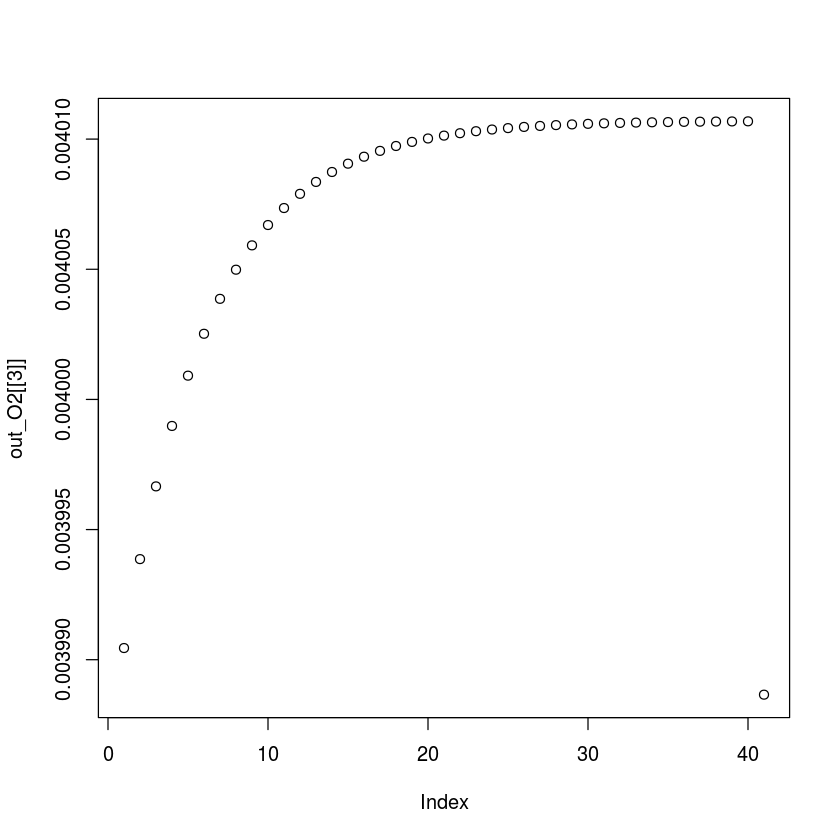

In [7]:
plot(out_O2[[3]])

What about the last point ?? How are the trajectories generated to have such final points ? The algorithm will detect here an accident whereas it seems to be a problem in the simulations

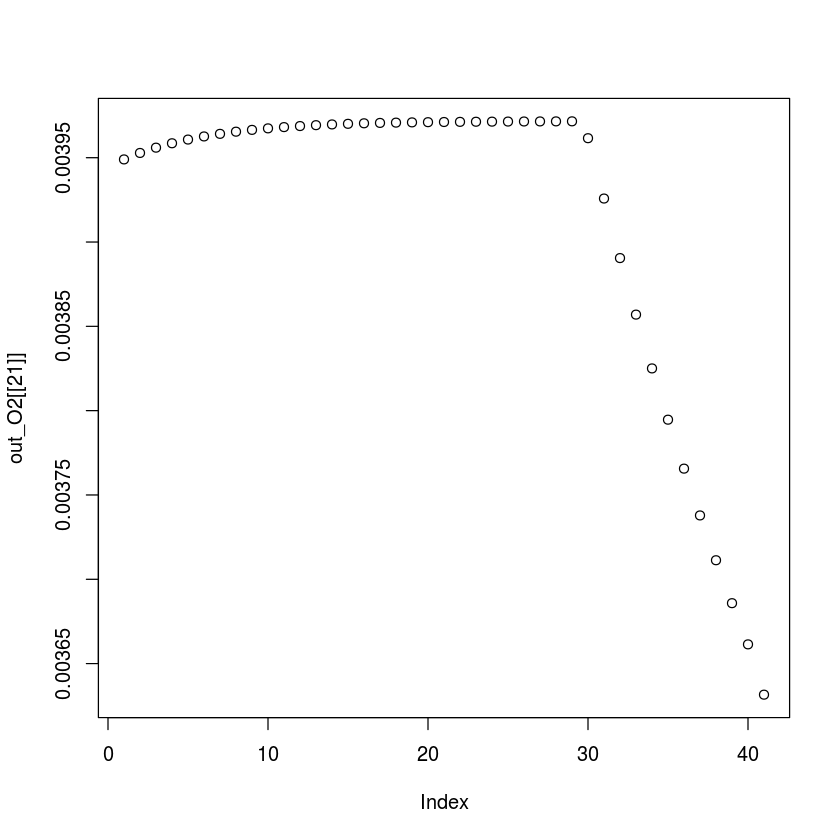

In [4]:
# A trajectory having an accident
plot(out_O2[[21]])

### Generation of the dataset with all the trajectories concatenated

In [8]:
data = out_O2[[1]]
cummean = cumsum(data) / seq(1, nb_t, 1)
cum_means = c(data[1], cummean[-1])

for (i in 2:nb_simu){
    data_simu = out_O2[[i]]
    data = c(data, data_simu)
    
    # Compute cumulated mean
    cummean = cumsum(data_simu) / seq(1, nb_t, 1)
    cummean = c(data_simu[1], cummean[-1]) # On décale d'un cran pour avoir les moyennes des (t-1) valeurs
    cum_means = c(cum_means, cummean)
}
data = data.frame(data)
colnames(data) = c("X")
data[['cum_mean']] = cum_means

# Add the information about beginning a new trajectory
one_trajec = c(1, rep(0, nb_t - 1))
data[['new_trajec']] = rep(one_trajec, nb_simu)

**The cumulated means computed :**

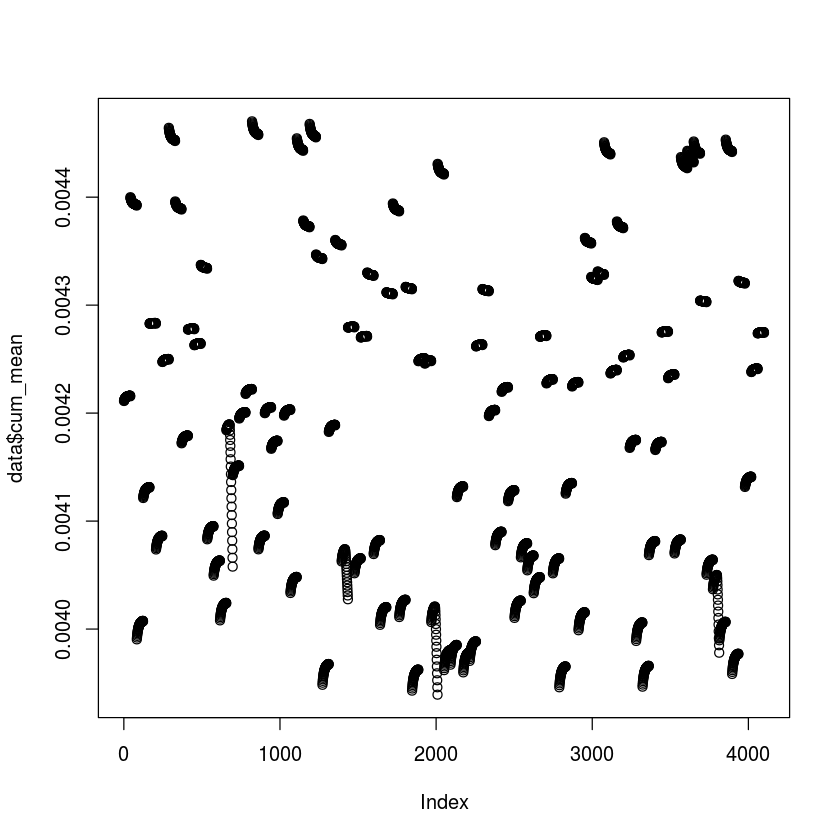

In [10]:
plot(data$cum_mean)

#### Difference between the cumulated mean and the value to choose a threshold to do an accident criterion 

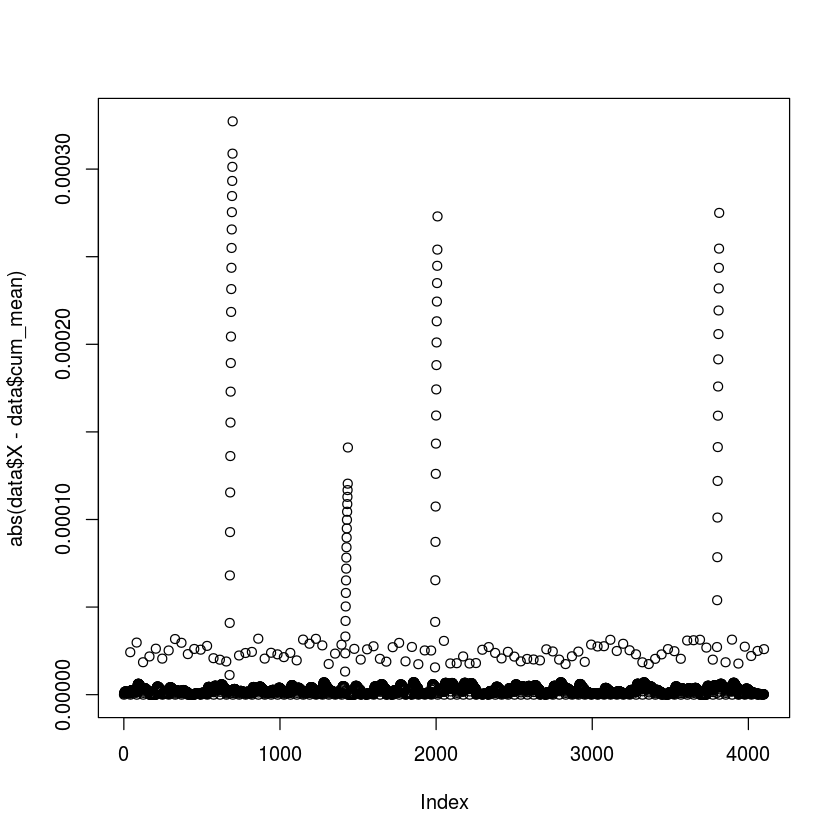

In [11]:
plot(abs(data$X - data$cum_mean))

## Accident criterion:
- |X(t) - CumMean(1 - (t-1))| > threshold\_mean **(Y1)**
- |X(t) - X_0| > threshold\_general **(Y2)**

In [14]:
thres_mean = 5e-5
X0 = 0.0042
thres_gal = 0.0004
data = transform(data, Y1 = ifelse(abs(X - cum_mean) > thres_mean , 1, 0))
data = transform(data, Y2 = ifelse(abs(X - X0) > thres_gal , 1, 0))
data = transform(data, Y = ifelse(Y1 + Y2 >= 1 , 1, 0))

In [15]:
print(length(data[data$Y == 1,]$Y))
head(data[data$Y == 1,], 30)

[1] 63


,X,cum_mean,new_trajec,Y1,Y2,Y
679,0.004115878,0.004183942,0,1,0,1
680,0.004087112,0.004179907,0,1,0,1
681,0.004059670,0.004175098,0,1,0,1
682,0.004033446,0.004169650,0,1,0,1
683,0.004008347,0.004163675,0,1,0,1
684,0.003984292,0.004157269,0,1,0,1
685,0.003961209,0.004150508,0,1,0,1
686,0.003939035,0.004143459,0,1,0,1
687,0.003917712,0.004136177,0,1,0,1
688,0.003897191,0.004128709,0,1,0,1


# OnlineSuperLearner

In [16]:
data_train = subset(data, select = c('X', 'Y'))
print(length(data_train$X))
head(data_train)

[1] 4100


X,Y
0.004211197,0
0.004212203,0
0.004212997,0
0.004213661,0
0.004214215,0
0.004214677,0


In [62]:
training_set_size = length(data_train$X)

#data.train <- simulator$simulateWAY(training_set_size + B + 100, qw=llW, ga=llA, Qy=llY, verbose=log)
data.train.static <- OnlineSuperLearner::Data.Static$new(dataset = data)

Warning message:
“replacing previous import ‘R.utils::extract’ by ‘magrittr::extract’ when loading ‘OnlineSuperLearner’”Warning message:
“replacing previous import ‘R.oo::equals’ by ‘magrittr::equals’ when loading ‘OnlineSuperLearner’”Warning message:
“replacing previous import ‘R.oo::getClasses’ by ‘methods::getClasses’ when loading ‘OnlineSuperLearner’”Warning message:
“replacing previous import ‘R.oo::getMethods’ by ‘methods::getMethods’ when loading ‘OnlineSuperLearner’”

In [63]:
X <- OnlineSuperLearner::RandomVariable$new(formula = X ~ Y_lag_1, family = 'gaussian')
Y <- OnlineSuperLearner::RandomVariable$new(formula = Y ~ X, family = 'binomial')

variable_of_interest <- Y
randomVariables <- c(X, Y)

In [64]:
algos <- list()

algos <- append(algos, list(list(algorithm = 'ML.XGBoost',
                       algorithm_params = list(alpha = 0),
                       params = list(nbins = c(6,40), online = TRUE))))

algos <- append(algos, list(list(algorithm = 'condensier::speedglmR6',
                      #algorithm_params = list(),
                      params = list(nbins = c(3,4, 5), online = FALSE))))


In [65]:
# bounds <- OnlineSuperLearner::PreProcessor.generate_bounds(data.train.static)
# pre_processor <- PreProcessor$new(bounds = bounds)

In [66]:
smg_factory <- OnlineSuperLearner::SMGFactory$new()
summaryMeasureGenerator <- smg_factory$fabricate(randomVariables)

In [67]:
log <- FALSE
osl  <- OnlineSuperLearner::OnlineSuperLearner$new(algos, summaryMeasureGenerator = summaryMeasureGenerator,
                                                   verbose = log)

In [71]:
nb_iter = 10

risk <- osl$fit(data.train.static, randomVariables = randomVariables,
                initial_data_size = training_set_size / 2,
                max_iterations = nb_iter,
                mini_batch_size = (training_set_size / 2) / nb_iter)

Warning message in private$transform_parameters(weights[-length(weights)], epsilon = epsilon, :
“In WCC.NMBFGS some of the parameters turned out to be Inf, NaN or NA!”Warning message in private$transform_parameters(weights[-length(weights)], epsilon = epsilon, :
“In WCC.NMBFGS some of the parameters turned out to be Inf, NaN or NA!”

ERROR: Error in `[.data.table`(data.splitted$test, , outcome.variables, with = FALSE): column(s) not found: X, Y


In [72]:
risk

X,Y
0.03626348,1.35476
X,Y
-3.790561,1.35476
X,Y
-3.899977,0.1361545
X,Y
-3.945187,0.1361545
X,Y
-4.004081,0.1361545
X,Y


In [73]:
datas <- summaryMeasureGenerator$getNext(n = nb_t)

In [75]:
tau = 3
result = foreach(i=seq(nb_t), .combine=rbind) %do% {
        osl$sample_iteratively(data = data_train[i,],
                           randomVariables = randomVariables,
                           tau = tau)[tau, 'Y']
    }

result %<>% unlist


ERROR: Error in foreach(i = seq(nb_t), .combine = rbind) %do% {: could not find function "%do%"
